In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  #import modules

In [20]:
path = "C:\\Users\\13475\\Downloads\\CMP414-765_Spring2020-master\\" 
filename = "week2.csv"
raw_data = pd.read_csv(path+filename, delimiter=",") #open file by path

In [21]:
raw_data.head()

,Entity,Code,Year,Unnamed: 3
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [33]:
filter1 = (raw_data["Entity"]=="United States")
data = raw_data[filter1]  #read entity of United States only
data.head()

,Entity,Code,Year,Unnamed: 3
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6


In [34]:
filter2 = (data['Year']>=1900)
data = data[filter2]
data.head()

,Entity,Code,Year,Unnamed: 3
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1
1204,United States,USA,1920,173.1
1205,United States,USA,1930,173.4
1206,United States,USA,1940,176.1


In [35]:
data = data.set_index(['Year'],drop=True)
data

,Entity,Code,Unnamed: 3
Year,,,
1900,United States,USA,170.0
1910,United States,USA,172.1
1920,United States,USA,173.1
1930,United States,USA,173.4
1940,United States,USA,176.1
1950,United States,USA,177.1
1960,United States,USA,177.3
1970,United States,USA,178.3
1980,United States,USA,179.0


In [36]:
data.drop(["Entity","Code"],axis=1,inplace=True)
data

,Unnamed: 3
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


In [37]:
data = data.rename(columns = {'Unnamed: 3':'Height(cm)'})
data

,Height(cm)
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


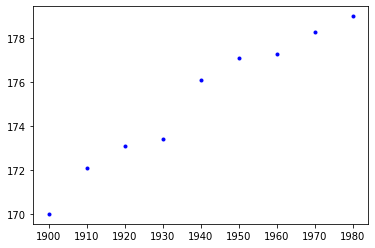

In [39]:
heights = data['Height(cm)']
years = data.index
plt.plot(years,heights,'b.')

In [41]:
rates_height_change = []
for year in data.index:
    if year == 1900:
        continue
    else:
        previous_year = year - 10
        diff_heights = data.loc[year, 'Height(cm)']-data.loc[previous_year,'Height(cm)']
        rate = diff_heights / 10
        rates_height_change.append(rate)
print(rates_height_change)

[0.20999999999999944, 0.1, 0.030000000000001137, 0.26999999999999885, 0.1, 0.020000000000001704, 0.1, 0.06999999999999887]


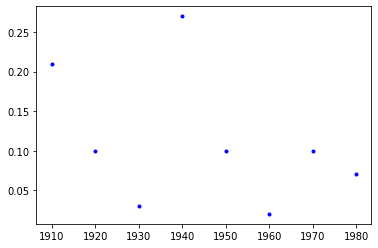

In [42]:
plt.plot(years[1:],rates_height_change,'b.')

In [47]:
m = np.mean(rates_height_change)
b = data.loc[1900, 'Height(cm)']-m*1900 #height = m*year + b
print(m,b)

0.1125 -43.75


In [52]:
x_coordinates = np.linspace(1900,1999,100)
print(x_coordinates)

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923.
 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935.
 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947.
 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959.
 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999.]


In [53]:
y_coordinates = m*x_coordinates + b
print(y_coordinates)

[170.     170.1125 170.225  170.3375 170.45   170.5625 170.675  170.7875
 170.9    171.0125 171.125  171.2375 171.35   171.4625 171.575  171.6875
 171.8    171.9125 172.025  172.1375 172.25   172.3625 172.475  172.5875
 172.7    172.8125 172.925  173.0375 173.15   173.2625 173.375  173.4875
 173.6    173.7125 173.825  173.9375 174.05   174.1625 174.275  174.3875
 174.5    174.6125 174.725  174.8375 174.95   175.0625 175.175  175.2875
 175.4    175.5125 175.625  175.7375 175.85   175.9625 176.075  176.1875
 176.3    176.4125 176.525  176.6375 176.75   176.8625 176.975  177.0875
 177.2    177.3125 177.425  177.5375 177.65   177.7625 177.875  177.9875
 178.1    178.2125 178.325  178.4375 178.55   178.6625 178.775  178.8875
 179.     179.1125 179.225  179.3375 179.45   179.5625 179.675  179.7875
 179.9    180.0125 180.125  180.2375 180.35   180.4625 180.575  180.6875
 180.8    180.9125 181.025  181.1375]


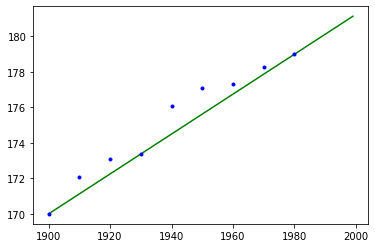

In [54]:
plt.plot(x_coordinates,y_coordinates,'g-')
plt.plot(years,heights,'b.')